In [29]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from geopy.distance import vincenty
%matplotlib inline

# Initialisation Data frame

In [82]:
dfinal=pd.DataFrame(columns=('BarLong','BarLat','Rayon','Number','date','Id'))
dfinal.loc[0] =[0,0, 0,0,0,0]

# Lecture des données

In [14]:
def monthCorrect(month):
    month=str(int(month))
    if len(month)==1:
        return '0'+month
    else:
        return month

In [15]:
df = pd.read_csv('../data/aden_golfe.csv',sep=';')
size = len(df)

In [16]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (with max distance)')
        plt.xlabel('sample index')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [17]:
df["mois (0)"]=df.apply(lambda row: monthCorrect(row['mois (0)']), axis=1)
df["date"]=df.apply(lambda row: str(row["Annee (0)"]) +"-"+ str(row["mois (0)"]), axis=1)

In [18]:
df["date"].unique()

array(['2010-10', '2010-01', '2010-02', '2010-03', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-11', '2010-04', '2010-12',
       '2008-02', '2008-03', '2008-04', '2008-05', '2008-07', '2008-08',
       '2008-09', '2008-10', '2008-11', '2008-12', '2008-06', '2009-01',
       '2009-02', '2009-03', '2009-04', '2009-05', '2009-07', '2009-12',
       '2009-06', '2009-08', '2009-09', '2009-10', '2009-11', '2011-01',
       '2011-04', '2011-09', '2011-02', '2011-05', '2011-07', '2011-08',
       '2011-10', '2011-03', '2011-11', '2011-06', '2011-12', '2012-02',
       '2012-12', '2012-03', '2012-04', '2012-01', '2012-06', '2012-05',
       '2012-07', '2013-03', '2013-06', '2013-05', '2013-07', '2013-12',
       '2014-01', '2014-04', '2014-02', '2014-03', '2014-08', '2014-12'], dtype=object)

In [80]:
def clusterise(date, max_d):
    #sous ensemble des données correspondant à la date choisie
    subDf = df[df["date"]==date]
    if(len(subDf) == 1):
        maxIdx=dfinal.index.values.max() 
        dfinal.loc[maxIdx+1] =[subDf["longitude"].values[0], subDf["latitude"].values[0], 0,1,date,date+'_'+str(1)]
        return dfinal
    #construction du dataframe 2D
    X = subDf[["longitude","latitude"]].values
    #clusterisation
    Z = linkage(X, 'ward', metric = 'euclidean')
    #affichage du dendrogram

    #fancy_dendrogram(
    #    Z,
    #    truncate_mode='lastp',
    #    p=12,
    #    leaf_rotation=90.,
    #    leaf_font_size=12.,
    #    show_contracted=True,
    #    max_d=max_d,  # arret du dendrogram
    #)
    #plt.show()
    #recuperation des clusters
    from scipy.cluster.hierarchy import fcluster
    clusters = fcluster(Z, max_d, criterion='distance')
    #print clusters
    #calcul du barycentre de chaque cluster

    centroidX = []
    centroidY = []
    for i in range(min(clusters),max(clusters)+1):
        x = np.mean(X[clusters==i,0])
        y = np.mean(X[clusters==i,1])
        point = (x,y)
        print point
        dist = []
        for j in range(0,len(X[clusters==i,0])):
            point2=(X[clusters==i,0][j], X[clusters==i,1][j])
            dist.append(vincenty(point, point2).kilometers)
        centroidX.append(x)
        centroidY.append(y)
        maxIdx=dfinal.index.values.max() 
        #print maxIdx
        dfinal.loc[maxIdx+1] =[x, y, max(dist),len(clusters[clusters==i]),date,date+'_'+str(i)]

    #affichage des clusters
    #plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
    #plt.scatter(centroidX,centroidY,cmap='prism')
    #plt.title('Clusters and their centroid')
    #plt.xlabel('Longitude')
    #plt.ylabel('Latitude')
    #plt.show()

    #dataframe final
    return dfinal

In [83]:
#df["date"].unique().len()+1
for i in range(0,len(df["date"].unique())):
#for i in range(0,1):
    print df["date"].unique()[i]
    clusterise(df["date"].unique()[i], 4.5)

2010-10
(49.162986111100004, 13.191875)
(55.191666666700002, 13.61666666665)
2010-01
(47.850833333333334, 12.711388888899998)
2010-02
(47.908333333350001, 13.033333333350001)
(43.433333333299998, 12.534722222200001)
2010-03
(44.337222222239994, 13.13061111112)
(48.967222222199993, 13.192222222199998)
(55.018333333299999, 14.9344444444)
2010-05
(54.57541666665, 14.692499999999999)
(43.892222222249998, 12.25930555555)
(48.149999999999999, 12.905555555566666)
2010-06
(49.949999999999996, 13.516666666666666)
(43.105404040409091, 13.071969696972728)
2010-07
(42.300555555539994, 14.35033333334)
2010-08
(49.243174603171433, 13.238888888885715)
(43.676111111099999, 13.016041666675001)
(41.418611111099999, 15.801666666700001)
2010-09
(49.809305555549997, 13.458333333300001)
(43.168611111099999, 12.9)
2010-11
(48.727222222199998, 13.789166666650001)
(53.950000000000003, 14.833333333299999)
2010-04
(51.450833333333328, 13.9736111111)
(55.633888888900003, 13.635277777799999)
(42.975972222199999, 1

In [84]:
dfinal

,BarLong,BarLat,Rayon,Number,date,Id
0,0.000000,0.000000,0.000000,0,0,0
1,49.162986,13.191875,47.973162,4,2010-10,2010-10_1
2,55.191667,13.616667,128.608970,2,2010-10,2010-10_2
3,47.850833,12.711389,96.305994,3,2010-01,2010-01_1
4,47.908333,13.033333,93.623201,2,2010-02,2010-02_1
5,43.433333,12.534722,0.000000,1,2010-02,2010-02_2
6,44.337222,13.130611,259.066145,5,2010-03,2010-03_1
7,48.967222,13.192222,24.540077,2,2010-03,2010-03_2
8,55.018333,14.934444,0.000000,1,2010-03,2010-03_3
9,54.575417,14.692500,29.182008,2,2010-05,2010-05_1


In [85]:
dfinal.to_csv("../data/aden_golfe_matrix_cluster.csv",sep=';', encoding='utf-8', index=False)

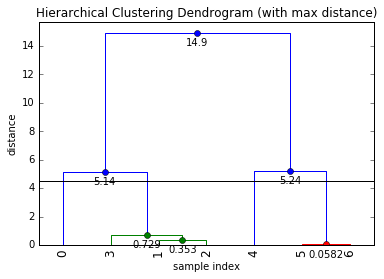

[2 1 1 1 4 3 3]


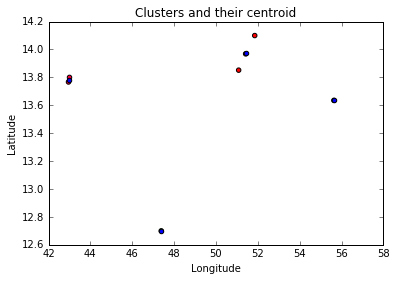

,BarLat,BarLong,Rayon,Number,date
0,0.000000,0.000000,0,0,0
1,51.450833,13.973611,0,3,2010-04
2,55.633889,13.635278,0,1,2010-04
3,42.975972,13.783611,0,2,2010-04
4,47.383333,12.700000,0,1,2010-04


In [85]:
clusterise('2010-04', 4.5)